### Ways to reduce colors in Image.

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


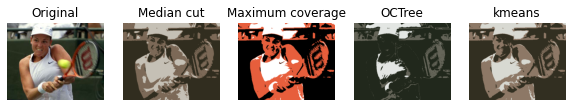

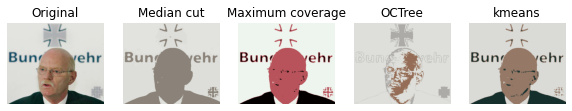

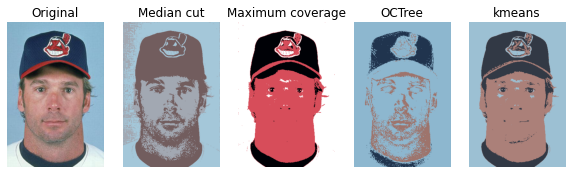

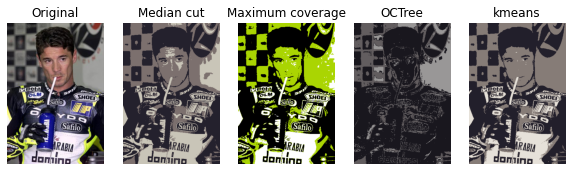

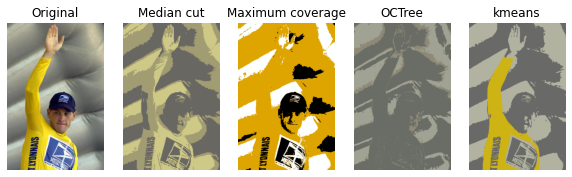

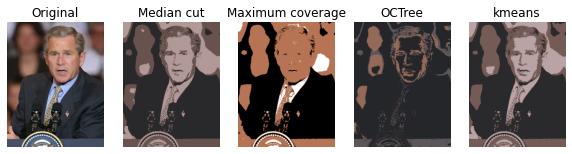

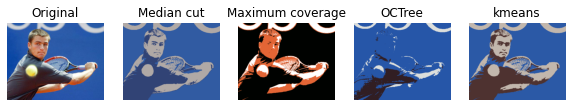

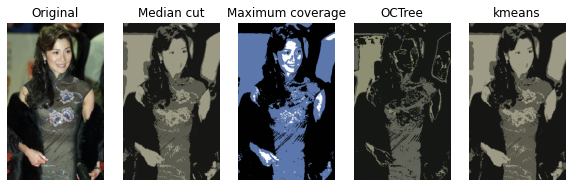

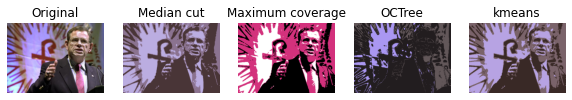

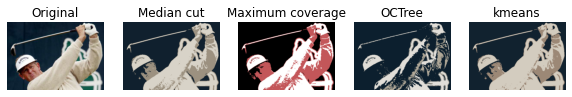

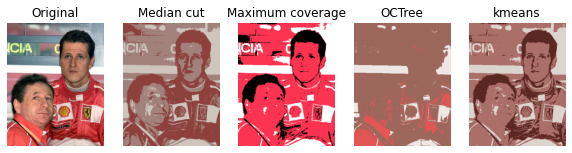

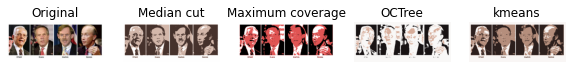

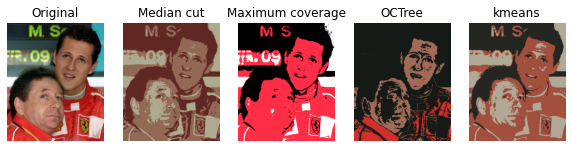

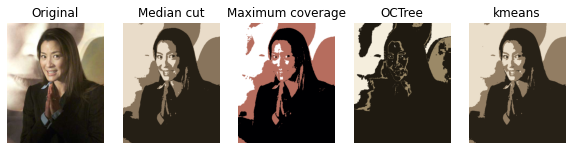

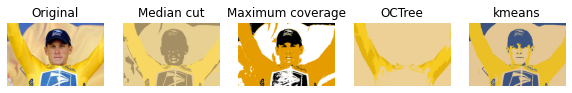

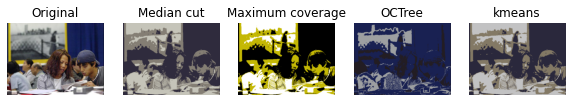

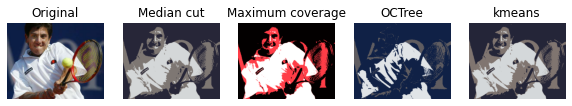

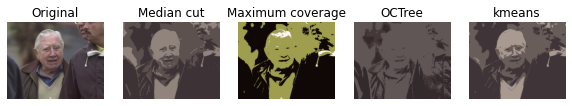

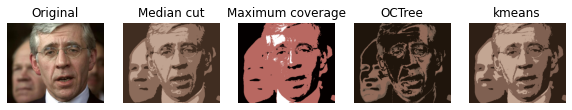

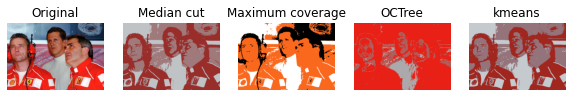

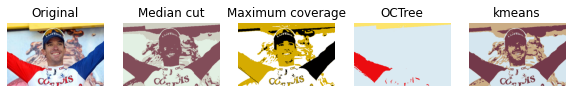

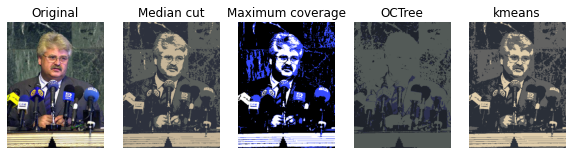

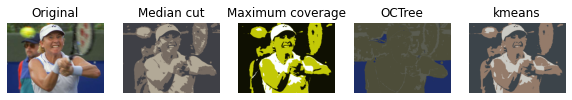

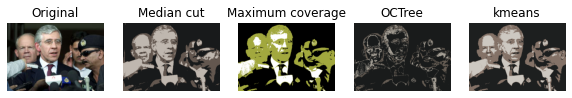

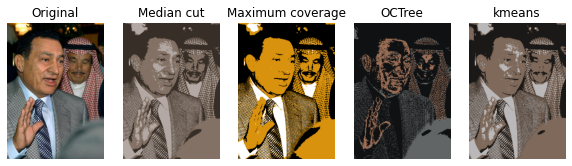

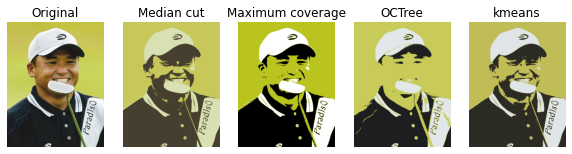

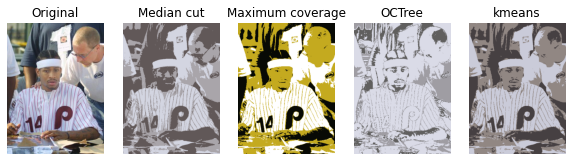

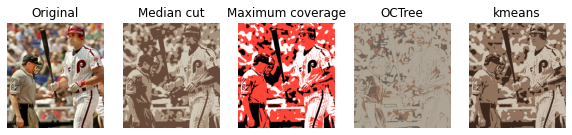

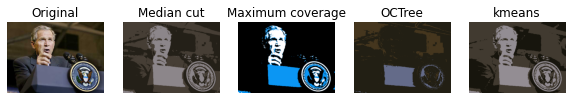

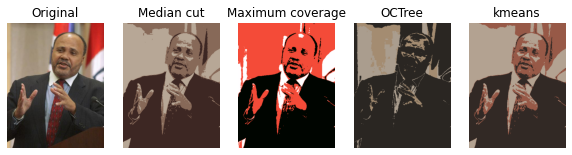

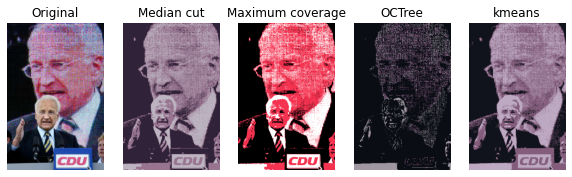

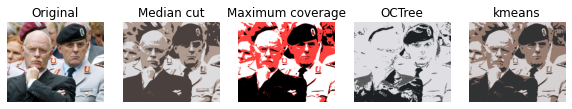

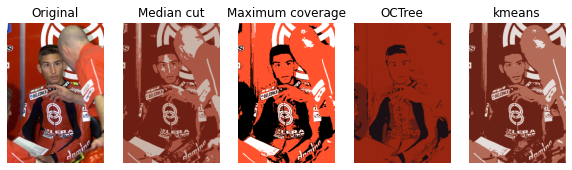

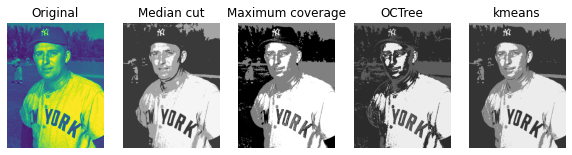

In [2]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from PIL import Image

def kmeans_reduce_color(im):
    img = cv2.imread(im)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax[0].imshow(img)
    ax[0].axis("off")

    Z = img.reshape((-1,3))
    Z = np.float32(Z) # convert to np.float32

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 1.0)
    K = 4
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    
    return res2
    
nCOLOR = 3
for i,im in enumerate(glob.glob("data/*")):
    
    fig, ax = plt.subplots(1, 5, figsize=(10, 5))
    
    #img0 = kmeans_reduce_color(im)
    img0 = Image.open(im) 
    ax[0].set_title("Original")
    ax[0].imshow(img0)
    ax[0].axis("off")
    
    img1 = Image.open(im)  
    img1 = img1.quantize(nCOLOR, method=0)  
    ax[1].set_title("Median cut")
    ax[1].imshow(img1)
    ax[1].axis("off")
    
    img2 = Image.open(im)  
    img2 = img2.quantize(nCOLOR, method=1)  
    ax[2].set_title("Maximum coverage")
    ax[2].imshow(img2)
    ax[2].axis("off")
    
    img3 = Image.open(im)  
    img3 = img3.quantize(nCOLOR, method=2)  
    ax[3].set_title("OCTree")
    ax[3].imshow(img3)
    ax[3].axis("off")
    
    img4 = Image.open(im)  
    img4 = img4.quantize(nCOLOR, kmeans=2)  
    ax[4].set_title("kmeans")
    ax[4].imshow(img4)
    ax[4].axis("off")
    
    plt.savefig(f"{i}.jpg", bbox_inches='tight', pad_inches=0)